In [1]:
!pip install statsbombpy
!pip install matplotlib
!pip install mplsoccer
from statsbombpy import sb
import pandas as pd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 2.0 MB/s eta 0:00:00


# Google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Statsbomb Data

In [9]:
#---------------------------Dane statsbomb---------------------------------------------------
free_comps = sb.competitions() #wszystkie darmowe dane ze statsbomb (podzielone na rozgrywki)
bayer_invicibles = sb.matches(competition_id=9, season_id=281)
bayer_invicibles = bayer_invicibles.sort_values(by='match_date')
#wszystkie strzały
all_events = []
#wiele ramek danych
for match_id in bayer_invicibles['match_id']:
    events = sb.events(match_id=match_id)
    all_events.append(events)
all_events = pd.concat(all_events) #połączenie w jedną ramkę danych
shots_all = all_events[(all_events['type'] == 'Shot')]
shots_all.to_csv('shots_all.csv', index=False)

#---------------------------Strzały zawodnika-------------------------------------------------
player_name = 'Victor Okoh Boniface'
all_events = []
#wiele ramek danych
for match_id in bayer_invicibles['match_id']:
    events = sb.events(match_id=match_id)
    all_events.append(events)
all_events = pd.concat(all_events) #połączenie w jedną ramkę danych
shots = all_events[(all_events['type'] == 'Shot') & (all_events['player'] == player_name)]

#-------------------------Metryki strzałów---------------------------------------------------
#suma wszystkich oddanych strzałów
total_shots = len(shots)
total_shots
#gole
goals = len(shots[shots['shot_outcome'] == 'Goal'])
goals
#total xg
total_xg = shots['shot_statsbomb_xg'].sum()
total_xg
#średnie xg dla strzału
average_xg = total_xg / total_shots
average_xg
#xg strzałów celnych (goal+save)
on_target_shots = shots[(shots['shot_outcome'] == 'Goal') | (shots['shot_outcome'] == 'Saved')| (shots['shot_outcome'] == 'Saved Off Target')]
on_target_xg = on_target_shots['shot_statsbomb_xg'].sum()
on_target_xg

11.383933797

# Single shot map visualization

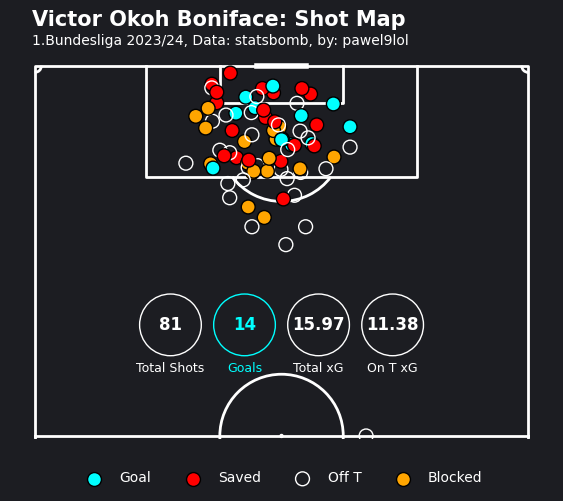

In [6]:
from mplsoccer import Pitch, VerticalPitch
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.font_manager as fm
from matplotlib.patches import Patch
import matplotlib.patches as patches
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
#vertical pitch - widok pionowy
vertical_pitch = VerticalPitch(
    half=True,
    pad_bottom=0.5,
    corner_arcs=True, #zaznaczenie rogów
    pitch_color='#1C1D22',
    line_color='white')
fig, ax = vertical_pitch.draw()
#usuwanie obramowania wokół wykresu (zmiana koloru)
fig.patch.set_facecolor('#1C1D22')  #kolor tła obramowania
#header nad wykresem
fig.text(0.11,1, f"{player_name}: Shot Map", fontsize=15, color='white', ha='left', fontweight='bold') #tytuł wykresu (figury)
fig.text(0.11, 0.96, "1.Bundesliga 2023/24, Data: statsbomb, by: pawel9lol", fontsize=10, color='white', ha='left')
#logo statsbomb
logo2 = mpimg.imread("/content/drive/MyDrive/statsbomb/statsbomb_logo.png")
#fig.figimage(logo2, xo=45, yo=75, zorder=10)

#współrzędne strzałów
x_shots = shots['location'].apply(lambda x: x[0])
y_shots = shots['location'].apply(lambda x: x[1])

#rodzaje strzałów
outcome_colors = {
    'Goal': 'cyan',
    'Saved': 'red',
    'Off T': 'none',
    'Saved to Post': 'red',
    'Blocked': 'orange',
    'Post': 'none',
    'Wayward': 'none',
    'Saved Off Target': 'red'
}

#plot na wykresie (zrobionym wyzej)
vertical_pitch.scatter(x_shots, y_shots,
                       s=100,
                       c=shots['shot_outcome'].map(outcome_colors),
                       edgecolors=shots['shot_outcome'].map({'Off T': 'white', 'Goal': 'black', 'Saved': 'black',
                                                             'Saved to Post': 'black', 'Blocked': 'black', 'Post': 'white', 'Wayward': 'white',
                                                             'Saved Off Target': 'red'}),
                       marker='o',
                       ax=ax)

offset_x = 3 # Wartość przesunięcia w lewo wszystkich kółek

def create_circled_number(
    ax, x, y, number, text, circle_color='none', text_color='white', fontsize=12, edgecolor='white', subtext_color='white'):
    # Tworzenie kółka
    circle = patches.Circle((x, y), radius=5, facecolor=circle_color, edgecolor=edgecolor)
    ax.add_patch(circle)

    # Dodawanie liczby do kółka
    ax.text(x, y, str(number), color=text_color, ha='center', va='center', fontsize=fontsize, fontweight='bold')

    # Dodawanie tekstu pod kółkiem
    ax.text(x, y - 6, text, color=subtext_color, ha='center', va='top',  fontsize=9)



# Dodawanie statystyk do wykresu
create_circled_number(ax, 25 - offset_x, 78, total_shots, "Total Shots")
create_circled_number(ax, 37 - offset_x, 78, goals, "Goals", edgecolor='cyan', text_color='cyan', subtext_color='cyan')  # Zmieniony kolor kółka dla goli
create_circled_number(ax, 49 - offset_x, 78, f"{total_xg:.2f}", "Total xG")
create_circled_number(ax, 61 - offset_x, 78, f"{on_target_xg:.2f}", "On T xG")

#legenda
legend_elements = [
    plt.scatter([], [], marker='o', s=100, edgecolors='black', facecolor='cyan', label='Goal'),
    plt.scatter([], [], marker='o', s=100, edgecolors='black', facecolor='red', label='Saved'),
    plt.scatter([], [], marker='o', s=100, edgecolors='white', facecolor='none', label='Off T'),
    plt.scatter([], [], marker='o', s=100, edgecolors='black', facecolor='orange', label='Blocked')
]
#pozycjonowanie legendy
ax.legend(
    handles=legend_elements,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.05),
    ncol=4,
    frameon=False,
    labelcolor='white'
)

#Eksportowanie do pliku PNG
plt.savefig('shot_map.png', dpi=300, bbox_inches='tight')

plt.show()

# Multiple shot maps visualization

<ipython-input-10-f2bd55630c97>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_shots['location'] = player_shots['location'].apply(eval) #konwersja danych z formatu tekstowego na listy - WAŻNE
<ipython-input-10-f2bd55630c97>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_shots['location'] = player_shots['location'].apply(eval) #konwersja danych z formatu tekstowego na listy - WAŻNE
<ipython-input-10-f2bd55630c97>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

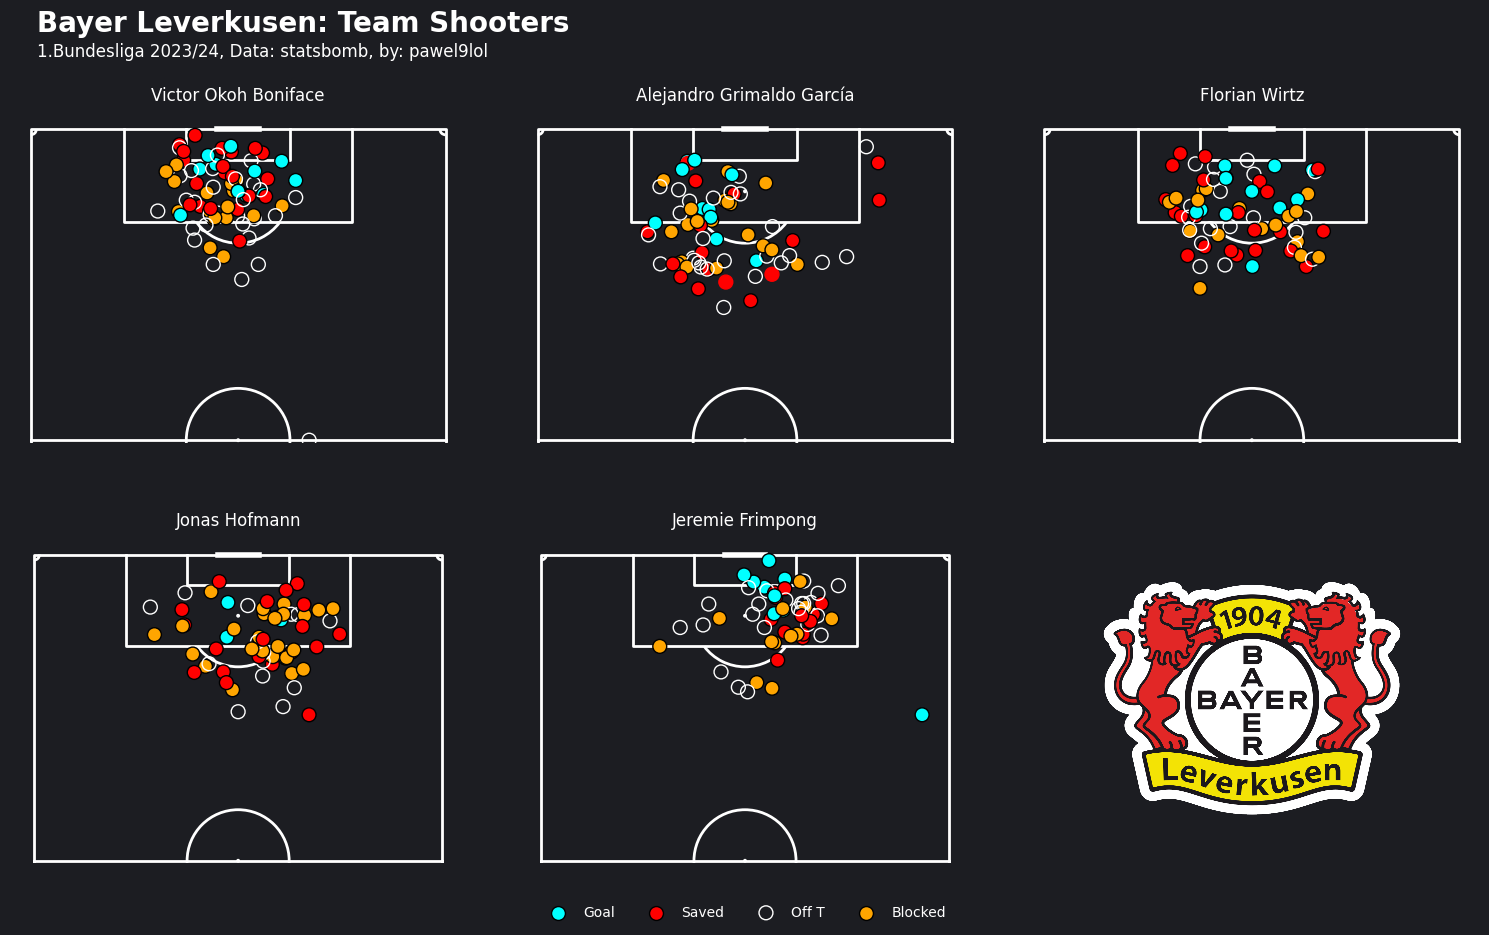

In [10]:
import numpy as np
from PIL import Image
# Definiowanie proporcji wysokości wierszy
gridspec_kw = {'height_ratios': [1, 0.5]}  # Drugi wiersz będzie 0.8x wysokości pierwszego

# Utworzenie figury i osi
fig, axes = plt.subplots(2, 3, figsize=(15, 10), gridspec_kw=gridspec_kw)

# Ukrycie nieużywanej osi (ostatnia w drugim rzędzie)
axes[1, 2].axis('off')

# Iteracja po osiach i tworzenie pustych map strzałów
for ax in axes.flatten():
    if ax is axes[1, 2]:  # Pomijanie ostatniej osi
        continue

    vertical_pitch = VerticalPitch(
        half=True,
        pad_bottom=0.5,
        corner_arcs=True,
        pitch_color='#1C1D22',
        line_color='white'
    )
    vertical_pitch.draw(ax=ax)


fig.patch.set_facecolor('#1C1D22') #tło figury

player_names = ["Victor Okoh Boniface","Alejandro Grimaldo García","Florian Wirtz", "Jonas Hofmann", "Jeremie Frimpong"]
for i, ax in enumerate(axes.flatten()):
    if i == 5:  # Pomijanie ostatniej osi
        continue

     #Dodanie nazwiska jako tytułu osi
    ax.set_title(player_names[i], fontsize=12, color='white')

#header nad wykresem
fig.text(0.028,0.9, "Bayer Leverkusen: Team Shooters", fontsize=20, color='white', ha='left', fontweight='bold') #tytuł wykresu (figury)
fig.text(0.028, 0.875, "1.Bundesliga 2023/24, Data: statsbomb, by: pawel9lol", fontsize=12, color='white', ha='left')

logo = mpimg.imread("/content/drive/MyDrive/statsbomb/Bayer_04_logo.png") #ścieżka do pliku!
# Utworzenie obiektu OffsetImage z logo i skalowaniem
imagebox = OffsetImage(logo, zoom=0.18)  # Dostosuj zoom do skalowania
# Dodanie logo do osi za pomocą AnnotationBbox
ab = AnnotationBbox(imagebox, (0.5, 0.5), frameon=False, xycoords='axes fraction',
                    box_alignment=(0.5, 0.5))  # Wyśrodkowanie logo
ax.add_artist(ab)

#----------------------Dodanie danych do wykresu----------------------------------------------------------------------------
all_shots = pd.read_csv('shots_all.csv')
for i, player_name in enumerate(player_names):
    ax = axes.flatten()[i]  # Wybranie osi dla danego zawodnika
    if i == 5:  # Pomijanie ostatniej osi
      continue
    player_shots = all_shots[all_shots["player"] == player_name]


    player_shots['location'] = player_shots['location'].apply(eval) #konwersja danych z formatu tekstowego na listy - WAŻNE
    x_shots = player_shots['location'].apply(lambda x: x[0])
    y_shots = player_shots['location'].apply(lambda x: x[1])

    outcome_colors = {
        'Goal': 'cyan',
        'Saved': 'red',
        'Off T': 'none',
        'Saved to Post': 'red',
        'Blocked': 'orange',
        'Post': 'none',
        'Wayward': 'none',
        'Saved Off Target': 'red'
    }
    vertical_pitch.scatter(x_shots, y_shots,
                           s=100,
                           c=player_shots['shot_outcome'].map(outcome_colors),
                           edgecolors=player_shots['shot_outcome'].map({'Off T': 'white', 'Goal': 'black', 'Saved': 'black',
                                                                         'Saved to Post': 'black', 'Blocked': 'black', 'Post': 'white', 'Wayward': 'white',
                                                                         'Saved Off Target': 'red'}),
                           marker='o',
                           ax=ax,)


#---------------------------------legenda--------------------------------------------------------------------------------------
legend_elements = [
    plt.scatter([], [], marker='o', s=100, edgecolors='black', facecolor='cyan', label='Goal'),
    plt.scatter([], [], marker='o', s=100, edgecolors='black', facecolor='red', label='Saved'),
    plt.scatter([], [], marker='o', s=100, edgecolors='white', facecolor='none', label='Off T'),
    plt.scatter([], [], marker='o', s=100, edgecolors='black', facecolor='orange', label='Blocked')
]
#pozycjonowanie legendy
ax.legend(
    handles=legend_elements,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.09),
    ncol=4,
    frameon=False,
    labelcolor='white'
)

plt.tight_layout() #unikanie nakładania się elementów i optymalizacja przestrzeni figury - potrzebne dla gridspec
plt.savefig('plotted_shot_maps.png', dpi=300, bbox_inches='tight')
plt.show()